In [60]:
pas=.1
eps=.0001

# Premier cas : Trouver le minimum d'une fonction f

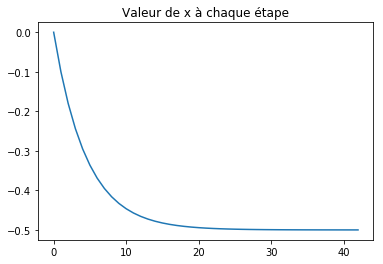

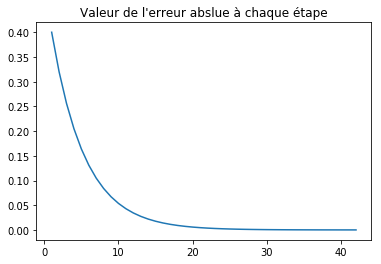

In [61]:
def f(x):
     return (x-1)*(x+2)
    
def gradf(x):
    return 2*x+1
    
x=0
liste=[0]
etape=[0]
i=0
while (gradf(x)>eps):
    x-=pas*gradf(x)
    i+=1
    etape.append(i)
    liste.append(x)
    
plt.plot(etape,liste)
plt.title("Valeur de x à chaque étape")
plt.show()
    
#Sachant que la réponse vaut .5 on peut plot l'erreur à chaque étape
x=0
liste=[]
etape=[]
i=0
while (gradf(x)>eps):
    x-=pas*gradf(x)
    i+=1
    etape.append(i)
    liste.append(abs(x+.5))
    
plt.plot(etape,liste)
plt.title("Valeur de l'erreur abslue à chaque étape")
plt.show()

# Deuxième cas: Régression linéaire, moindres carrés (cas y=ax+b)

In [62]:
def S(y,x,a,b):
    S=0
    for i in range (len(y)):
        S+=(y[i]-a*x[i]-b)**2
    return S/len(y)
    
def gradS(y,x,a,b):
    S1, S2 = 0, 0
    for i in range (len(y)):
        S1+=x[i]*(y[i]-a*x[i]-b)
        S2+=(y[i]-a*x[i]-b)
    S1*=-2
    S2*=-2
    return[S1/len(y),S2/len(y)]
    

On utilise le modèle suivant, très simple pour tester: 

In [63]:
a, b = 1,1
x=[k*.01 for k in range(20)]
y=[12*p +.05 for p in x]  

La réponse étant a=12 et b=0,05 on vérifie en regardant la perte ((a-12)²+(b-0,05)²)/2

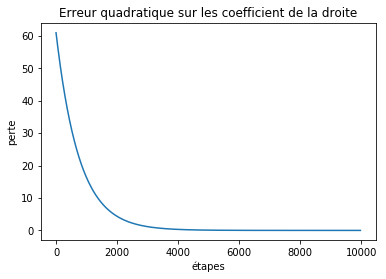

In [64]:
etape=[]
e=0
perte=[]

while (max(gradS(y,x,a,b))>eps) or (min(gradS(y,x,a,b))<-eps):
    e+=1
    etape.append(e)
    perte.append(((a-12)**2+(b-0.05)**2)/2)
    a-=pas*gradS(y,x,a,b)[0]
    b -= pas * gradS(y, x, a, b)[1]

plt.plot(etape,perte)
plt.title("Erreur quadratique sur les coefficient de la droite")
plt.xlabel("étapes")
plt.ylabel("perte")
plt.show()
    

# Test sur un échantillon quelconque : dataset de kaggle

In [73]:
dataset = pd.read_csv("test.csv")
print(dataset.head())

pas = .001
eps = .1

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


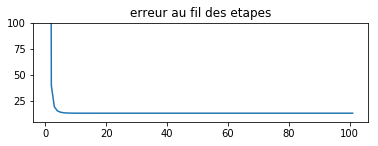

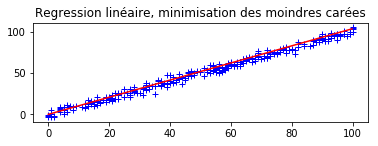

In [74]:
def S(y,x, a):
    S = 0
    for i in range(len(y)):
        S += (float(y[i]) - float(a.dot(x[i]))) ** 2
    return S / len(y)


def gradS(y,x, a):
    S = []
    for p in range(a.size):
        aux = 0
        for i in range(len(y)):
            aux -= float(x[i][p]) * (float(y[i]) - float(a.dot(x[i])))
        S.append(aux / len(y))
    return S


data = pd.read_csv("test.csv")
# conversion des dataframes en array pour pouvoir travailler
#on suppose que la derniere colonne est y et les premières colonnes sont les x
x_data = data.iloc[:,0:data.shape[1]-1]
y_data = data.iloc[:,data.shape[1]-1:data.shape[1]]
x=x_data.get_values()
y=y_data.get_values()
# on rajoute une ligne de 1 dans x pour le coefficient constant, ce qui s'appelle intercept souvent
x = np.concatenate((np.transpose(np.ones((1, len(x)))), x), axis=1)

#valeur de depart
a=np.array([[.1 for k in range(data.shape[1])]])

perte = []
etape = []
e = 0
while (max(gradS(y, x, a)) > eps) or (min(gradS(y, x, a)) < -eps):
    pas=pas/2
    e += 1
    for i in range(a.size):
        a[0][i] -= pas * gradS(y, x, a)[i]
    etape.append(e)
    perte.append(S(y, x, a))
    if e>100:
        break

plt.figure()
plt.subplot(211)
plt.plot(etape, perte)
plt.title("erreur au fil des etapes")
axes = plt.gca()
axes.set_ylim(5, 100)
plt.show()

plt.subplot(212)
#attention quand on plot à enlever la colonne de 1 du x
plt.plot(x[:,1],y,'b+')
t=np.arange(0., 100., 0.2)
plt.plot(t,a[0][1]*t+a[0][0],'r')
plt.title("Regression linéaire, minimisation des moindres carées")
plt.show()


J'ai illustrer l'algorithme précédant avec une régression linéaire du type y=ax+b mais l'algorithme marche également pour une régression multilinéaire de type $Y=A^{t}X$